# Exploration des relevés de données des bâtiments 

In [1]:
import pandas as pd
import numpy as np 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pingouin as pg

import missingno as msno

In [2]:
sns.set_palette("Pastel2")

- **SiteEUIWN :** Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
- **SourceEUIWN :** Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
- **SiteEnergyUse :** The annual amount of energy consumed by the property from all sources of energy.
- **GHGEmissions :** The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu. 
- **GHGEmissions Intensity :** Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources.

*Source* : [Ville de Seattle](!https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m)

*Autres sources :*

- [Différence entre source et site](!https://www.energystar.gov/buildings/benchmark/understand_metrics/source_site_difference)
- [Définition de l'EUI](!https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui)
- [Energy Star Score](!https://www.energystar.gov/buildings/benchmark/analyze_benchmarking_results)
- [Définition des types de bâtiments](!https://portfoliomanager.energystar.gov/pm/glossary)

## Traitement des données de 2015

In [3]:
filepath_2015 = 'datasets/2015-building-energy-benchmarking.csv'
df_2015 = pd.read_csv(filepath_2015)
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


In [4]:
df_2015['PropertyName'] = df_2015["PropertyName"].str.capitalize()
df_2015['Neighborhood'] = df_2015["Neighborhood"].str.capitalize()

In [5]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [6]:
df_2015["Outlier"].value_counts()

High Outlier    46
Low Outlier     38
Name: Outlier, dtype: int64

In [7]:
df_2015 = df_2015.loc[~(df_2015["Outlier"] == "High Outlier") |
                      ~(df_2015["Outlier"] == "Low Outlier")]

In [8]:
df_2015.isnull().mean() * 100

OSEBuildingID                                                     0.000000
DataYear                                                          0.000000
BuildingType                                                      0.000000
PrimaryPropertyType                                               0.000000
PropertyName                                                      0.000000
TaxParcelIdentificationNumber                                     0.059880
Location                                                          0.000000
CouncilDistrictCode                                               0.000000
Neighborhood                                                      0.000000
YearBuilt                                                         0.000000
NumberofBuildings                                                 0.000000
NumberofFloors                                                    0.239521
PropertyGFATotal                                                  0.000000
PropertyGFAParking       

In [9]:
df_2015 = df_2015.loc[:, df_2015.isnull().mean() <.50]
df_2015.dropna(thresh=4, inplace=True)

In [10]:
df_2015.drop(["TaxParcelIdentificationNumber","Location","CouncilDistrictCode",
              "ListOfAllPropertyUseTypes", "LargestPropertyUseType", "PropertyGFAParking",
              "DefaultData", "ComplianceStatus", 
              "Seattle Police Department Micro Community Policing Plan Areas","SPD Beats", "Zip Codes"], axis = 1, inplace=True) 

In [11]:
df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                        "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity"}, inplace=True)

## Traitement des données de 2016

In [12]:
filepath_2016 = 'datasets/2016-building-energy-benchmarking.csv'
df_2016 = pd.read_csv(filepath_2016)
df_2016.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


In [13]:
df_2016['PropertyName'] = df_2016["PropertyName"].str.capitalize()
df_2016['Neighborhood'] = df_2016["Neighborhood"].str.capitalize()

In [14]:
df_2016["Outlier"].value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [15]:
df_2016 = df_2016.loc[~(df_2016["Outlier"] == "High Outlier") |
                      ~(df_2016["Outlier"] == "Low Outlier")]

In [16]:
df_2016.isnull().mean() * 100

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.473934
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.236967
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.266588
LargestPropertyUseType            

In [17]:
df_2016 = df_2016.loc[:, df_2016.isnull().mean() <.50]
df_2016.dropna(thresh=4, inplace=True) 

In [18]:
df_2016.drop(["TaxParcelIdentificationNumber", "Address", "City", "State", "Latitude", "Longitude","ZipCode","CouncilDistrictCode",
              "ListOfAllPropertyUseTypes", "LargestPropertyUseType", "PropertyGFAParking",
              "DefaultData", "ComplianceStatus"], axis = 1, inplace=True) 

## Création d'un dataset avec les données de 2015 & 2016

In [19]:
df = pd.concat([df_2015,df_2016], join="outer", ignore_index=True, verify_integrity=True)
df.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,Mayflower park hotel,Downtown,1927,1.0,12.0,88434,...,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64
1,2,2015,NonResidential,Hotel,Paramount hotel,Downtown,1996,1.0,11.0,103566,...,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38
2,3,2015,NonResidential,Hotel,Westin hotel,Downtown,1969,1.0,41.0,961990,...,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92


## Traitement du dataset crée

In [20]:
df = df.loc[(df["BuildingType"] == "NonResidential") |
            (df["BuildingType"] == "SPS-District K-12")| 
            (df["BuildingType"] == "Nonresidential COS")|
            (df["BuildingType"] == "Campus")]

In [21]:
char_correction = {"Distribution Center\n" : "Distribution Center",
                   "Self-Storage Facility\n" : "Self-Storage Facility",
                   "Restaurant\n" : "Restaurant"}

for key, value in char_correction.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

C:\Users\cecil\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
df = df.loc[~(df["PrimaryPropertyType"] == "Low-Rise Multifamily")]

In [23]:
df.shape

(3312, 27)

## Analyse exploratoire

## Séparation du jeu de données

On crée un jeu de données d'entraînement qui va être celui que l'on va analyser durant l'analyse exploratoire des données. Le jeu de test sera laissé de côté pour valider nos modèles. 

In [24]:
from sklearn.model_selection import train_test_split

test_set, train_set = train_test_split(df, test_size=0.2, random_state=42)

In [25]:
test_set.to_csv("datasets/test_set.csv")
train_set.to_csv("datasets/train_set.csv")

In [26]:
df = test_set.copy()

### Analyses univariées

In [27]:
df.shape

(2649, 27)

In [28]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [29]:
cat_var = ["DataYear", "BuildingType", "PrimaryPropertyType", "Neighborhood",
           "NumberofBuildings"]

num_var = ["YearBuilt", "NumberofFloors", "PropertyGFATotal", "PropertyGFABuilding(s)",
           "ENERGYSTARScore", "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)",
           "SourceEUIWN(kBtu/sf)", "SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)",
           "Electricity(kWh)", "Electricity(kBtu)", "NaturalGas(therms)", "NaturalGas(kBtu)", 
           "OtherFuelUse(kBtu)","TotalGHGEmissions", "GHGEmissionsIntensity"]

In [30]:
for col in num_var : 
    ind = df.loc[(df[col] < 0)].index.to_list()
    df.drop(index=ind, inplace=True)

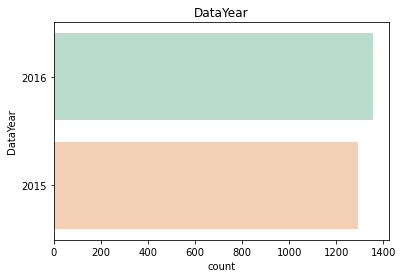

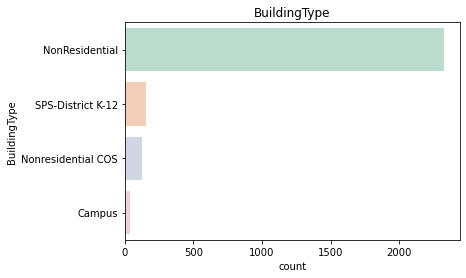

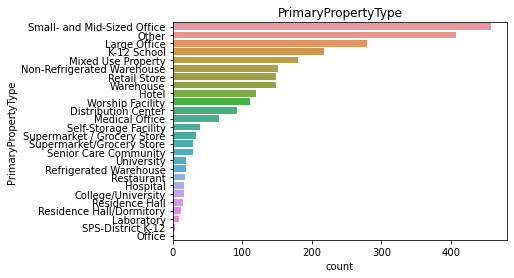

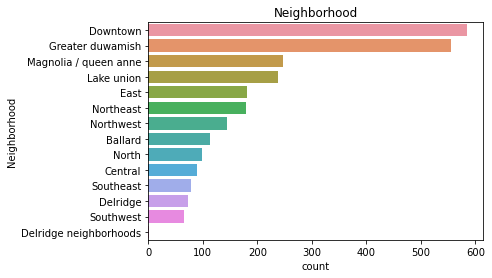

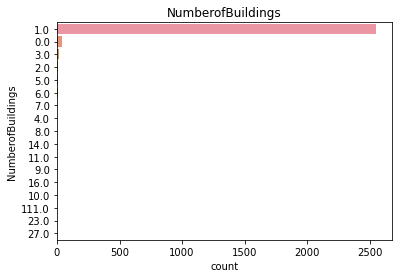

In [31]:
for cols in cat_var:
    sns.countplot(y=cols, data=df, order=df[cols].value_counts().index)
    plt.title(cols)
    plt.show()

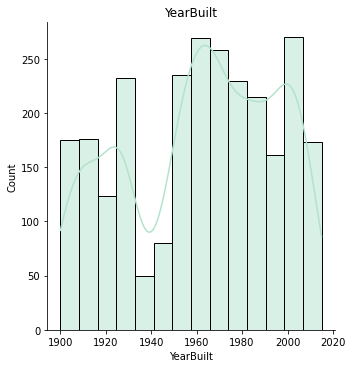

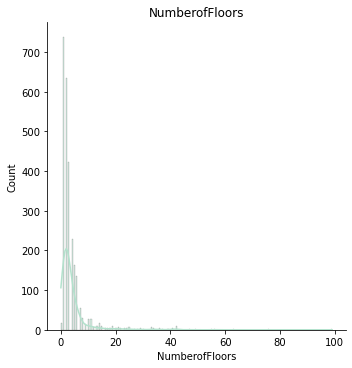

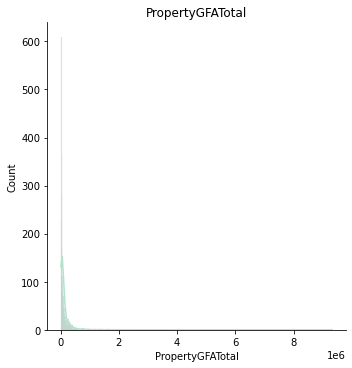

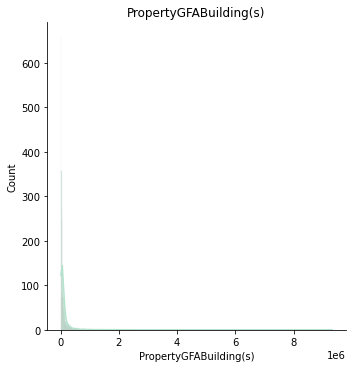

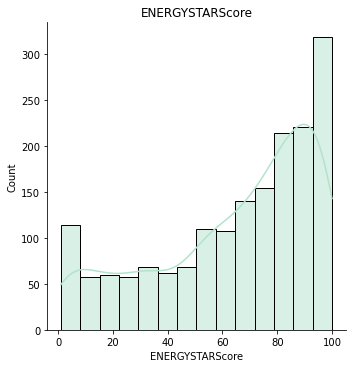

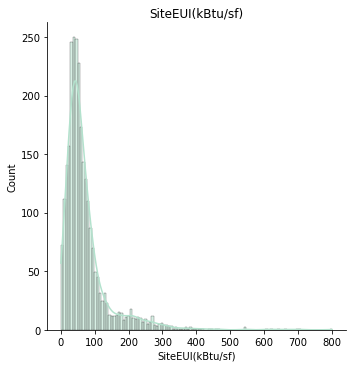

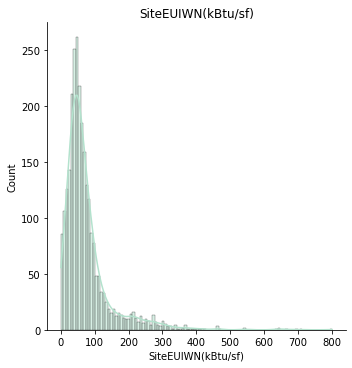

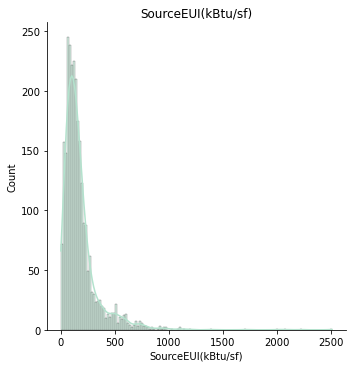

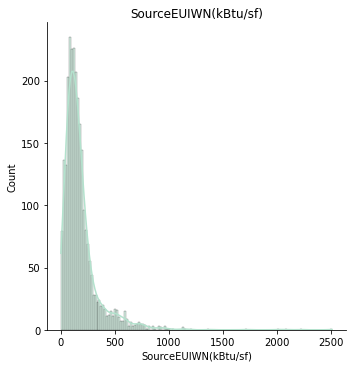

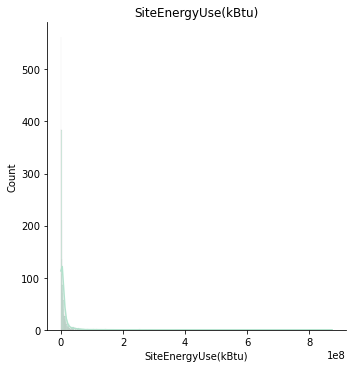

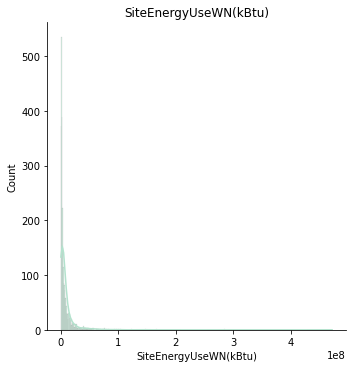

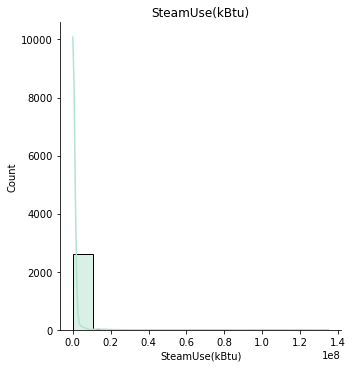

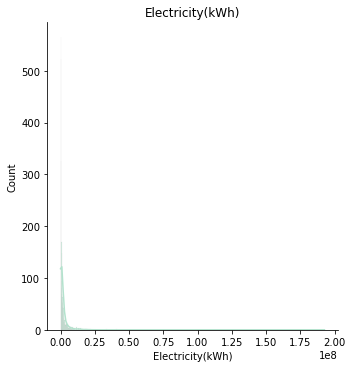

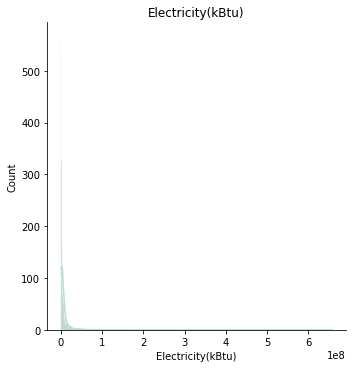

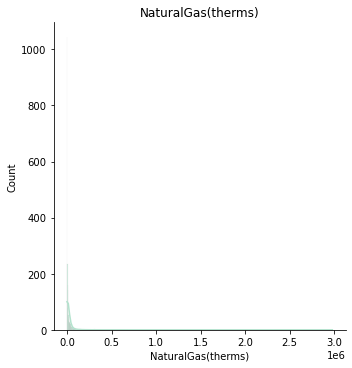

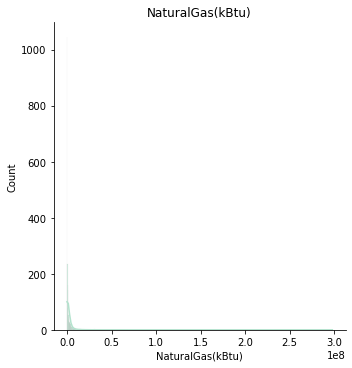

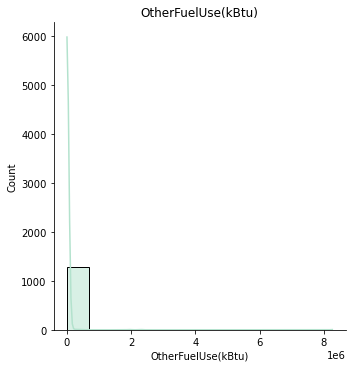

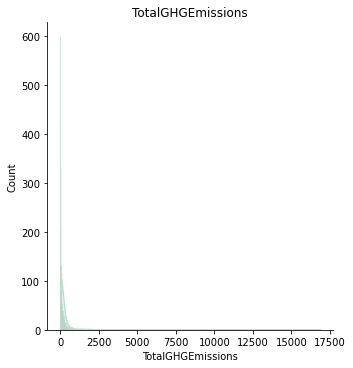

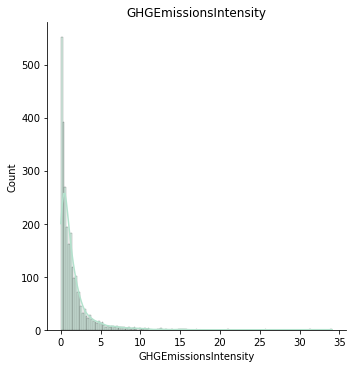

In [32]:
for cols in num_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

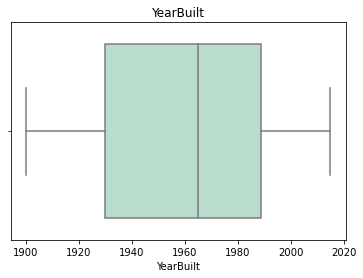

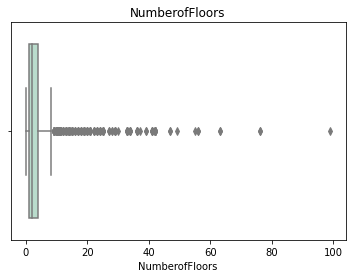

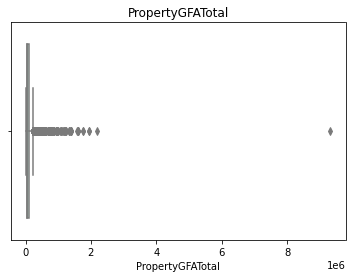

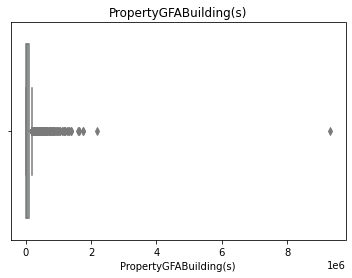

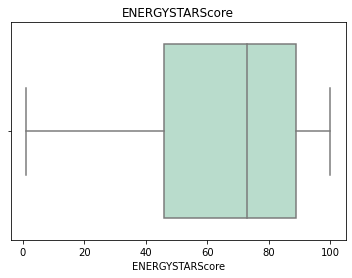

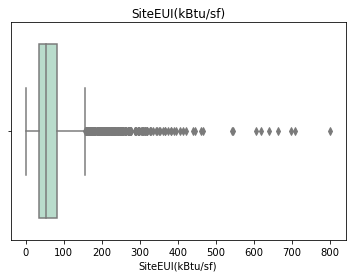

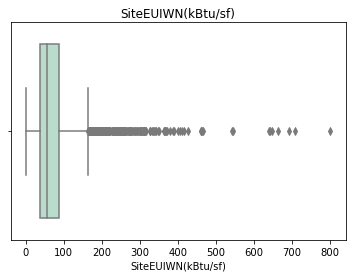

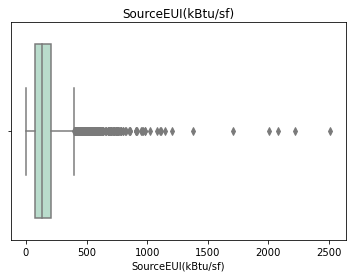

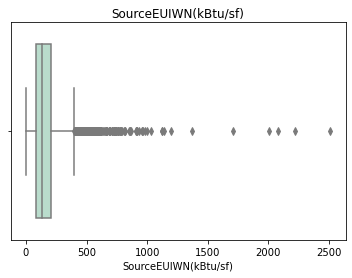

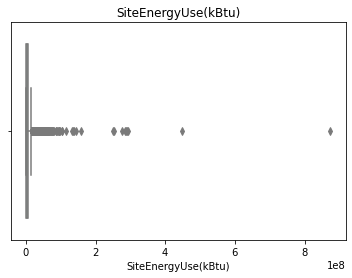

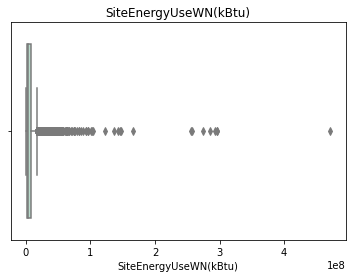

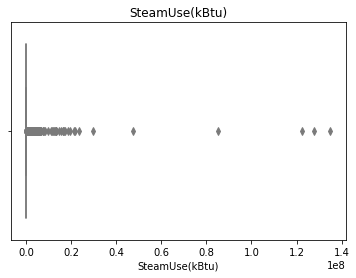

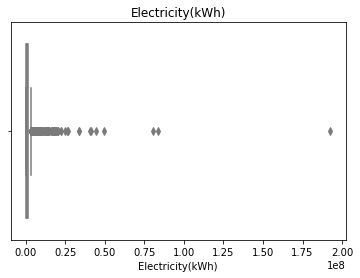

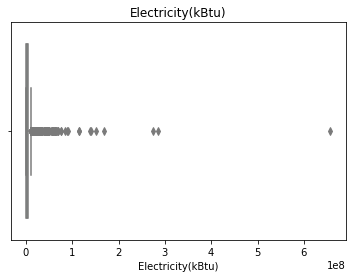

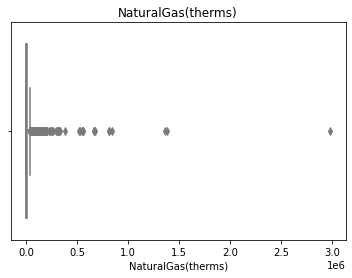

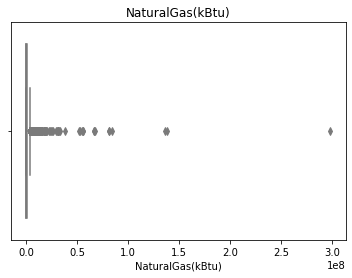

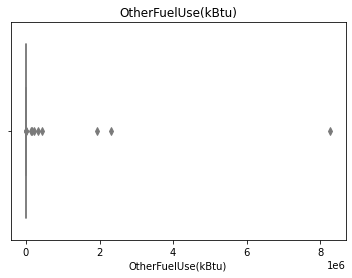

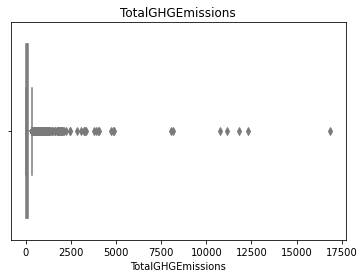

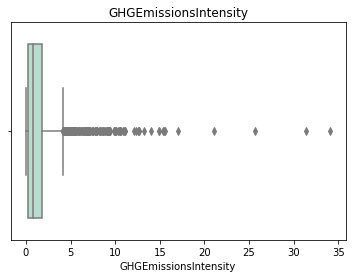

In [33]:
for cols in num_var:
    sns.boxplot(x=cols, data=df)
    plt.title(cols)
    plt.show()

In [34]:
pg.normality(df,method="normaltest")

,W,pval,normal
OSEBuildingID,72.440790,1.860725e-16,False
DataYear,9375.251230,0.000000e+00,False
YearBuilt,808.417535,2.846838e-176,False
NumberofBuildings,7702.544463,0.000000e+00,False
NumberofFloors,2939.876770,0.000000e+00,False
PropertyGFATotal,5668.976044,0.000000e+00,False
PropertyGFABuilding(s),6059.496266,0.000000e+00,False
LargestPropertyUseTypeGFA,6127.342970,0.000000e+00,False
ENERGYSTARScore,192.761139,1.388195e-42,False
SiteEUI(kBtu/sf),2004.673414,0.000000e+00,False


In [35]:
pg.homoscedasticity(df, method="levene")

,W,pval,equal_var
levene,NaN,NaN,False


In [36]:
df.drop(["OSEBuildingID", "DataYear"], axis=1, inplace=True)

In [37]:
df.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,2646.000000,2646.000000,2640.000000,2.646000e+03,2.646000e+03,2.589000e+03,1755.000000,2639.000000,2639.000000,2640.000000,...,2.640000e+03,2.639000e+03,2.640000e+03,2.640000e+03,2.640000e+03,2.640000e+03,2.640000e+03,1.286000e+03,2640.000000,2640.000000
mean,1961.518519,1.129252,4.145833,1.168092e+05,1.036614e+05,9.676227e+04,64.676353,71.917469,75.146268,176.305909,...,8.289778e+06,8.143319e+06,4.624087e+05,1.689140e+06,5.763456e+06,1.986194e+04,1.986194e+06,1.077647e+04,181.357723,1.491027
std,32.612200,2.362898,6.601550,2.620820e+05,2.470796e+05,2.411956e+05,29.059823,71.555808,72.965143,177.266026,...,2.689757e+07,2.138470e+07,5.004284e+06,5.455716e+06,1.861509e+07,8.661042e+04,8.661042e+06,2.459443e+05,690.331083,2.225840
min,1900.000000,0.000000,0.000000,1.168500e+04,1.092500e+04,5.656000e+03,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1930.000000,1.000000,1.000000,2.951225e+04,2.856900e+04,2.562000e+04,46.000000,33.500000,36.000000,77.375001,...,1.242740e+06,1.343473e+06,0.000000e+00,2.156248e+05,7.357190e+05,0.000000e+00,0.000000e+00,0.000000e+00,19.727500,0.270000
50%,1965.000000,1.000000,2.000000,4.968000e+04,4.755700e+04,4.366100e+04,73.000000,51.900002,55.000000,131.349998,...,2.542779e+06,2.707837e+06,0.000000e+00,4.752101e+05,1.621417e+06,4.815500e+03,4.815680e+05,0.000000e+00,49.845000,0.800000
75%,1989.000000,1.000000,4.000000,1.060308e+05,9.485325e+04,9.128100e+04,89.000000,82.200000,86.600000,206.474999,...,7.180783e+06,7.451311e+06,0.000000e+00,1.460915e+06,4.984796e+06,1.513374e+04,1.513365e+06,0.000000e+00,140.630000,1.810000
max,2015.000000,111.000000,99.000000,9.320156e+06,9.320156e+06,9.320156e+06,100.000000,800.600000,800.600000,2511.100000,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,8.269669e+06,16870.980000,34.090000


### Analyses bivariées

In [38]:
df.drop(["PropertyGFABuilding(s)","LargestPropertyUseTypeGFA", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)",
         "SiteEnergyUse(kBtu)", "Electricity(kWh)", "NaturalGas(therms)"], axis=1, inplace=True)

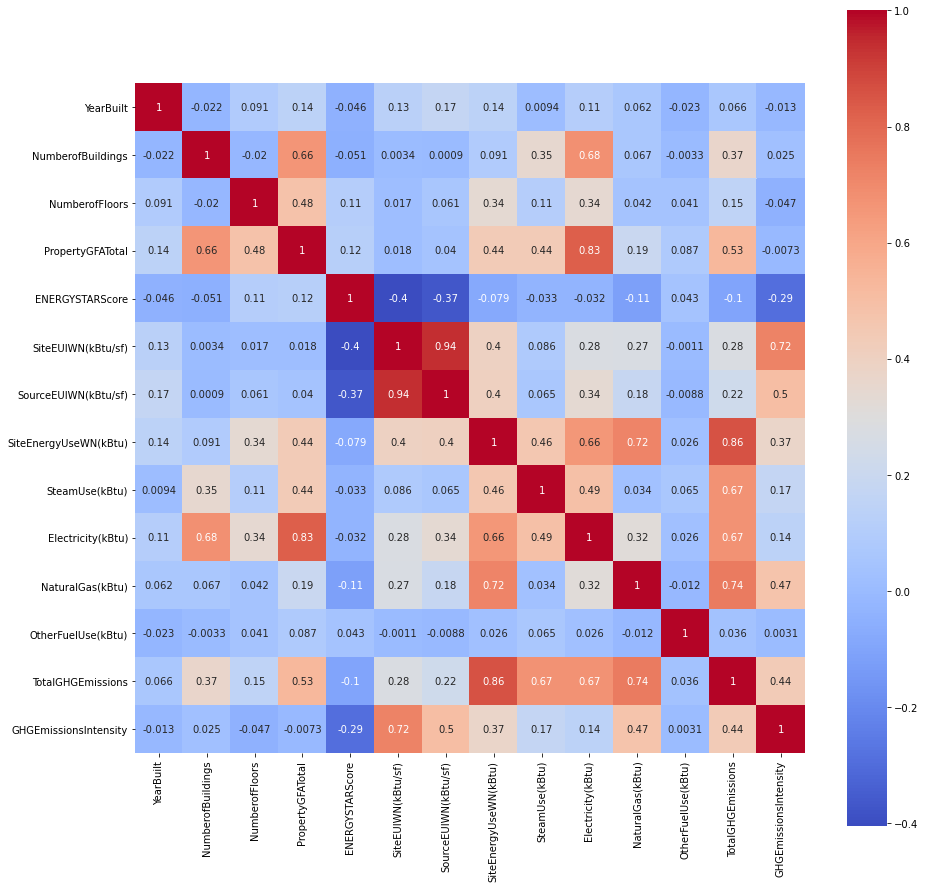

In [40]:
matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(matrix, square=True, annot=True, cmap="coolwarm")
plt.show()